# Pràctica 5: Arbres de Decisió


## Avaluació i entregues

### Entregues
Les pràctiques es realitzarán els divendres de 15:00 a 17:00. Cada setmana presentarem nous mètodes i algorismes vistos a la classe de teoria.

L'entrega, es realitzarà el següent **~~dijous abans de les 23:59~~**  <span style="color:orange">**dimecres abans de les 10.00**</span>, és a dir, tindreu les hores de classe més **quasibé** tota una setmana per a realitzar les tasques. Es pujará un .ipynb ja executat, on no només hi hagi codi sinó també text explicatiu de gràfiques, resultats, i analisis. Tingueu en compte que no es valora tant la quantitat, sino la qualitat del que s'hi explica. Hem d'aprendre a extreure el gra de la palla i presentar-ho de forma correcta i concisa.


### Avaluació
Aquesta pràctica tractará els següents temes:

* A. Estructura dels Arbres de Decisió i codificació d'atributs (30%)
* B. Selecció de mesures d'atributs (20%)
* C. Pruning (20%)
* D. Ensembles (30%)

Per descomptat, tots els experiments seguiran aplicant els coneixements apresos a les pràctiques anteriors, és a dir, aplicant una metodologia correcta de crosvalidació per tal de poder extreure conclusions vàlides.


### Datasets

Es faràn servir dues bases de dades:

* **car_evaluation.csv** (target: 'class') 

* **income_evaluation.csv** (target: 'income')

Inicialment, es farán les proves amb el car_evaluation. Al apartat D s'utilitzaràn els dos. De tota forma, si ho preferiu, també podeu anar fer proves amb income_evaluation ens els altres apartats.


### Introducció

Els arbres de decisió són un dels algorismes d’aprenentatge automàtic més populars. Utilitzen una estructura semblant a la dels arbres (o també en possibles combinacions seves). Pertany a la classe d’algoritmes d’aprenentatge supervisat on es pot utilitzar tant amb finalitats de classificació com de regressió.


Un arbre de decisió és una estructura que inclou un node arrel, branques i nodes de fulles. Cada node intern indica una prova d'un atribut, cada branca indica el resultat d'una prova i cada node fulla té una etiqueta de classe. El node més superior de l'arbre és el node arrel.

La terminologia implicada en l'algorisme de l'arbre de decisions són els següents:

* **Node arrel**: Representa tota la població o la mostra. A més, es divideix en dos o més conjunts homogenis.
* **Divisió**: És el procés de dividir un node en dos o més subnodes.
* **Node de decisió**: Quan un node es divideix en altres subnodes, es diu node de decisió.
* **Fulla / node terminal**: Els nodes que no es divideixen s’anomenen nodes Fulla o Terminals.
* **Poda**: Quan eliminem els subnodes d’un node de decisió, aquest procés s’anomena poda. És el procés contrari de la divisió.
* **Branca / subarbre**: Una subsecció d'un arbre sencer s'anomena branca o subarbre.
* **Node pare i fill**: Un node, que es divideix en subnodes, s’anomena node pare de subnodes on els subnodes són fills d’un node pare.

![Decision-Tree terminology](https://gdcoder.com/content/images/2019/05/Screen-Shot-2019-05-18-at-03.40.41.png)

Com s'ha explicat a teoria, els arbres de decisió originals treballaven sobre atributs categorics sense problema. Ara bé, la implementació de sklearn i la majoria de les actuals, necesita dades númeriques, aixi que haurem de transformar les nostres bases de dades a aquesta tipologia.

Explicació del la tipologia de arbres de Decisió: ID3, C4.5, C5.0 i CART. Sabeu quin està implementat a sklearn i per què les dades d'entrada han de ser numèriques i no categòriques? **[Pista](https://scikit-learn.org/stable/modules/tree.html)**


In [2]:
# Importar llibreries i obrir el dataset
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
# sns.set_theme()

# Visualitzarem només 3 decimals per mostra, i definim el num de files i columnes a mostrar
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 50)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple

dataset_path = 'car_evaluation.csv'
target_name = 'class'

#dataset_path = 'income_evaluation.csv'
#target_name = 'income'

dataset = load_dataset(dataset_path)
y = dataset[target_name]
X = dataset.drop(target_name, axis="columns")

print("Dimensionalitat de la BBDD:", dataset.shape)


Dimensionalitat de la BBDD: (1728, 7)


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((1382, 6), (346, 6))

**[Off-topic]** Pel que es pregunti de on prové la `y` minúsucla pel target i la `X` majuscula de les dades.. [Enllaç](https://stats.stackexchange.com/questions/389395/why-uppercase-for-x-and-lowercase-for-y)

In [4]:
display(dataset)


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


## A. Estructura dels Arbres de Decisió i codificació d'atributs (30%)

Com transformar dades Categoriques en numèriques:

**[module-sklearn.preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)**

o bé, 

**[Category Encoders](https://contrib.scikit-learn.org/category_encoders/)**

Aquesta llibreria us permetrar provar codificacions ben diferents..:
* BackwardDifferenceEncoder
* BaseNEncoder
* BinaryEncoder
* CatBoostEncoder
* CountEncoder
* GLMMEncoder
* HashingEncoder
* HelmertEncoder
* JamesSteinEncoder
* LeaveOneOutEncoder
* MEstimateEncoder
* OneHotEncoder
* OrdinalEncoder
* SumEncoder
* PolynomialEncoder
* TargetEncoder
* WOEEncoder

En aquest enllaç hi podreu trobar alguns **[exemples](https://www.kaggle.com/discdiver/category-encoders-examples)**.

**[Com aplicar-ho a pandas?](https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn)**


In [5]:
# Una manenra d'aplicar-ho a columnes en concret
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
encoder_i = ce.OrdinalEncoder(cols = 'class')
encoded_X_train_1 = encoder.fit_transform(X_train)
encoded_X_test_1 = encoder.transform(X_test)
encoded_y_train_1 = encoder_i.fit_transform(y_train)
encoded_y_test_1 = encoder_i.transform(y_test)


In [6]:
# Una altra manera per fer-ho a totes les columnes no númeriques..

from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

encoders = defaultdict(LabelEncoder)

# Encoding the variable
encoded_X_train_2 = X_train.apply(lambda x: encoders[x.name].fit_transform(x))
encoded_X_test_2 = X_test.apply(lambda x: encoders[x.name].transform(x))

# Inverse the encoded
inversed_X_train = encoded_X_train_2.apply(lambda x: encoders[x.name].inverse_transform(x))

# Using the dictionary to label future data
# X_train.apply(lambda x: encoders[x.name].transform(x))

print("\n The result of transforming X with LabelEncoder:")
print(encoded_X_train_2)
print(type(encoded_X_train_2))


 The result of transforming X with LabelEncoder:
      buying  maint  doors  persons  lug_boot  safety
107        3      3      3        2         0       0
901        2      3      1        1         2       2
1709       1      1      3        0         0       0
706        0      2      2        0         1       2
678        0      2      1        0         1       1
...      ...    ...    ...      ...       ...     ...
1130       2      2      1        2         1       0
1294       2      1      3        2         0       2
860        0      1      3        2         1       0
1459       1      0      2        0         2       2
1126       2      2      1        2         2       2

[1382 rows x 6 columns]
<class 'pandas.core.frame.DataFrame'>


### Preguntes
1. Proveu diferents codificacions per transformar els vostres atributs categorics en númerics. Expliqueu els beneficis o inconvenients de les codificacions provades.
2. Crea un arbre arbre de decisió amb les dades transformades.
3. Mostra el arbre de diferents formes: [exemple](https://mljar.com/blog/visualize-decision-tree/)
4. Extreu caracteristiques que quantifiquin com és l'arbre. Més endavant també en farem ús per comparar diferents arbres. A continuació et mostro algunes possibles característiques. Penseu en generar-ne alguna més que cregueu útil:
 * número de nodes total,
 * número de nodes fulla,
 * ratio de nodes fulla respecte el total,
 * profunditat mitjana de les fulles,
 * atributs més utilitzats,
 * entropia o impuresa dels nodes fulla
 * ... 
5. Com afecta la codificació utilitzada a la interpretabilitat del model, veus alguna relació amb les característiques del arbre?

1.

He provat el OneHotEncoder tot i que no l'he utlitzat ja que m'augmentava el número d'atributs.

In [7]:
encoder_1 = ce.OneHotEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
encoder_0 = ce.OneHotEncoder(cols = 'class')

encoded_X_train_0 = encoder_1.fit_transform(X_train)
encoded_X_test_0 = encoder_1.transform(X_test)
encoded_y_train_0 = encoder_0.fit_transform(y_train)
encoded_y_test_0 = encoder_0.transform(y_test)
display(encoded_X_train_0)

,buying_1,buying_2,buying_3,buying_4,maint_1,maint_2,maint_3,maint_4,doors_1,doors_2,doors_3,doors_4,persons_1,persons_2,persons_3,lug_boot_1,lug_boot_2,lug_boot_3,safety_1,safety_2,safety_3
107,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
901,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
1709,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0
706,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0
678,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0
1294,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
860,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0
1459,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0


2

In [7]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(encoded_X_train_1, encoded_y_train_1)
clf.score(encoded_X_test_1, encoded_y_test_1)

0.953757225433526

Veiem que amb l'arbre de desició obtenim un score molt bo amb el conjunt de test.

3.

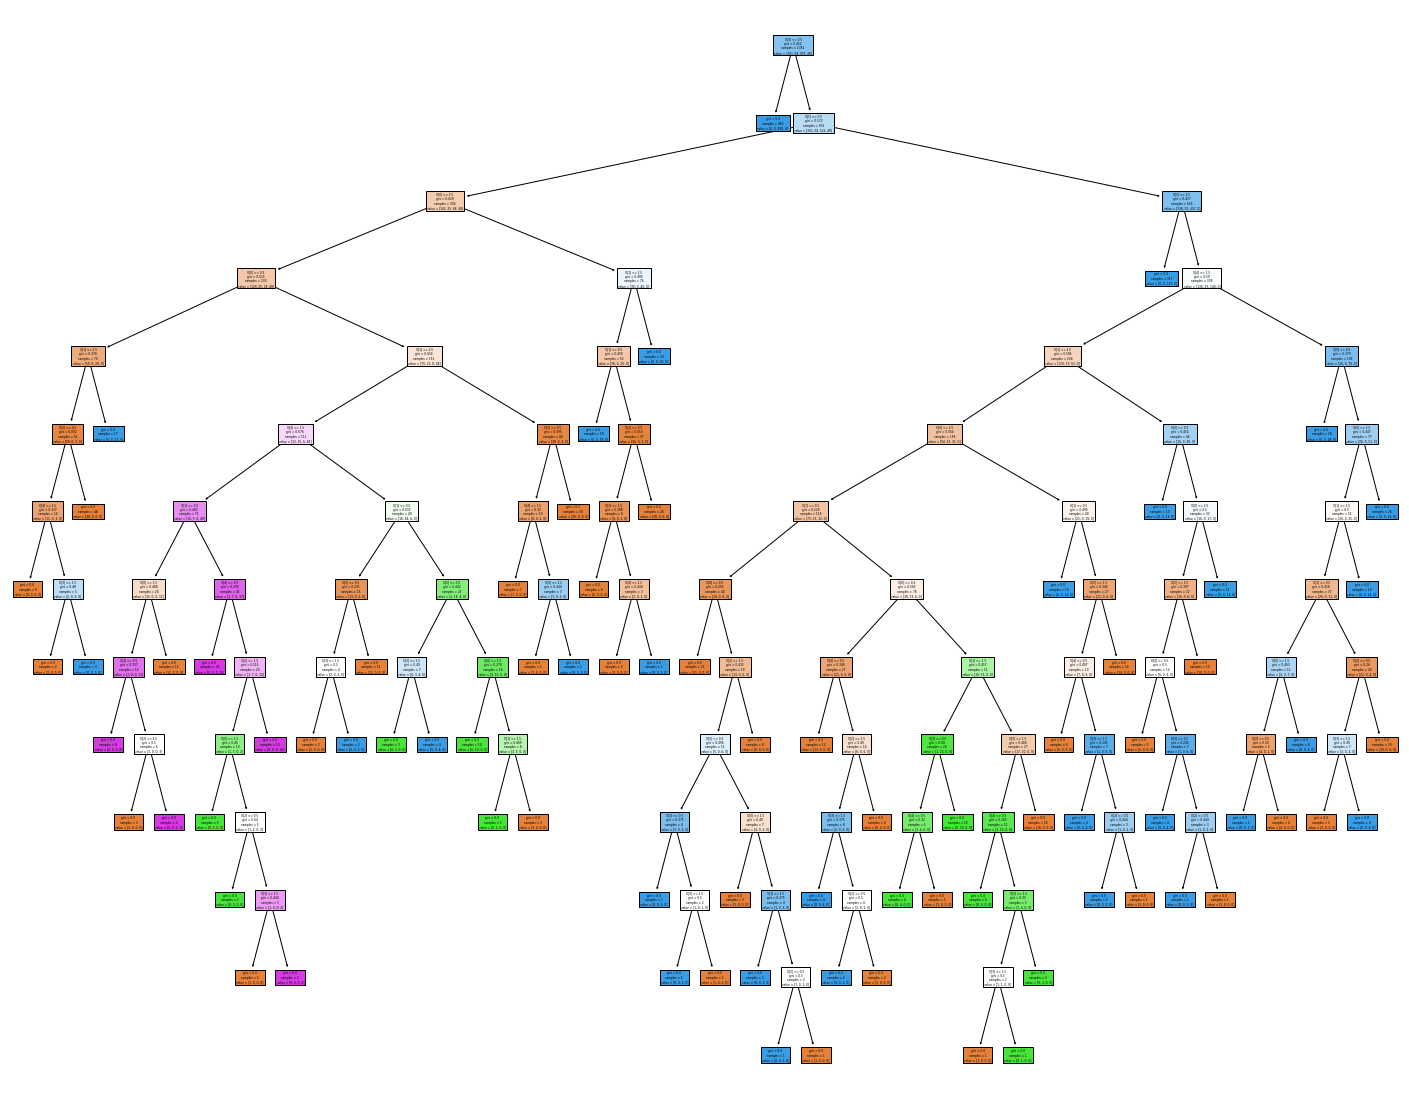

In [26]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, filled = True)

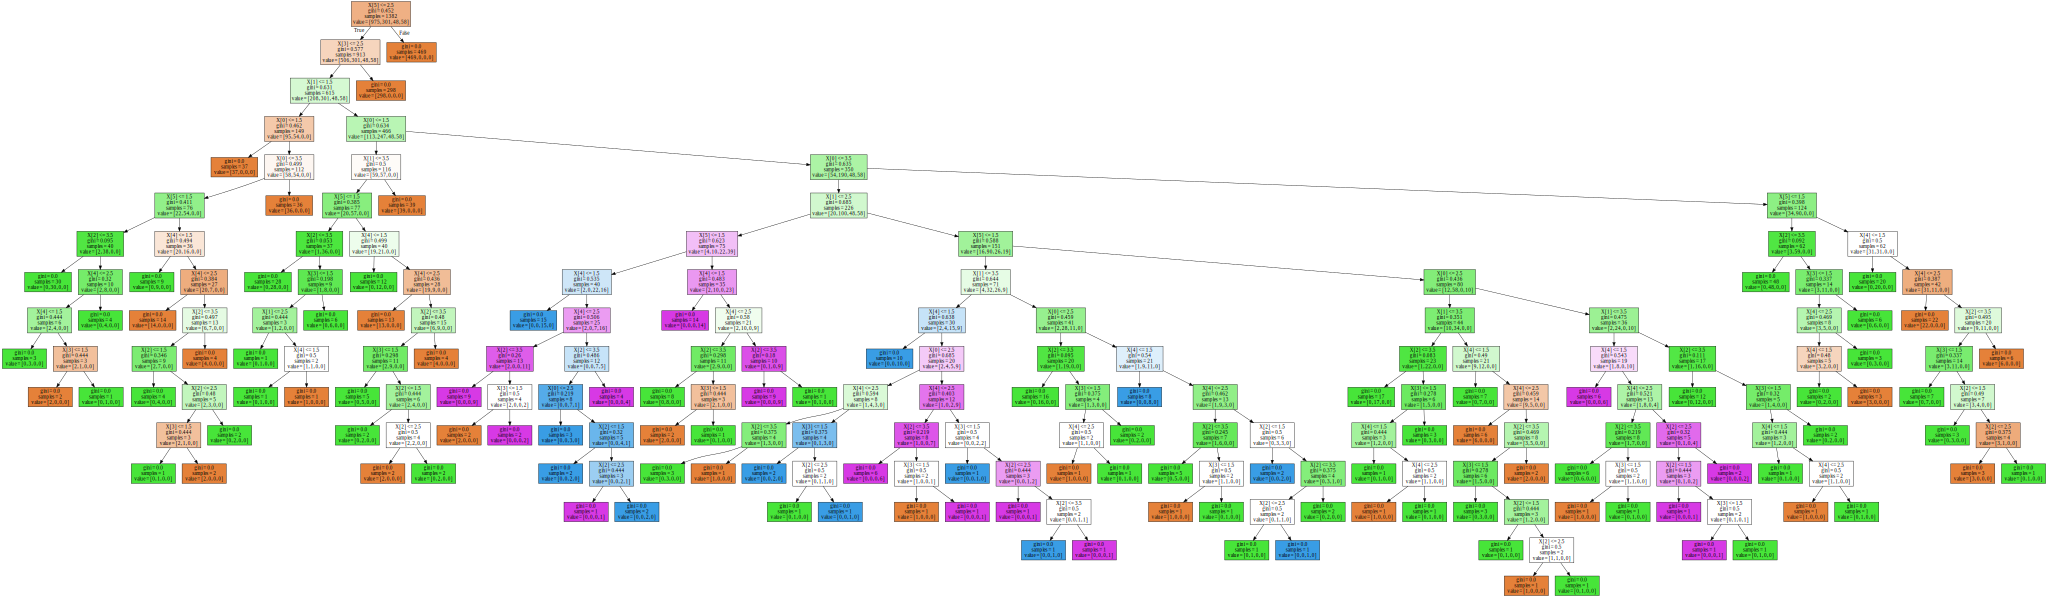

In [10]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph #Ens podem desplaçar pel graph

In [34]:
clf.tree_.node_count

157

4.

In [99]:
def numero_nodes(clf):
    return clf.tree_.node_count
    
def numero_fulles(clf):
    return clf.get_n_leaves()
    
def profunditat(clf):
    return clf.get_depth()

def ratio_nodes_fulla(clf):
    return numero_fulles(clf)/numero_nodes(clf)

5.

Efectivament, la codificació utilitzada és molt important a la hora de preprocessar les dades ja que si ho fem malament, o fem servir algun codificació que no és aplicable per les nostres dades podem obtenir un model que no té cap mena de sentit tot i resultats d'score que poguem obtenir. Un exemple seria fer servir el LabelEncoder per codificar els atributs 'x' ja que com el seu nom indica, està fet per codificar el label y.

## B. Selecció de mesures d'atributs (20%)
El principal repte en la implementació de l'arbre de decisions és identificar els atributs que considerem com a node arrel i cada nivell. Aquest procés es coneix com a **selecció d’atributs**. Hi ha diferents mesures de selecció d’atributs per identificar l’atribut que es pot considerar com el node arrel de cada nivell. Les 2 mesures més populars:

### Guany d'informació (entropy)

En utilitzar el guany d’informació com a criteri, intentem estimar la informació que conté cada atribut. Per entendre aquest concepte, hem de conèixer el que significa l'**Entropia**.

L’entropia mesura la impuresa del conjunt de dades donat. A Física i Matemàtiques, l’entropia es coneix com l’atzar o incertesa d’una variable aleatòria $X$. En teoria de la informació, es refereix a la impuresa d’un grup d’exemples. **El guany d'informació** és la disminució de l'entropia. El guany d'informació calcula la diferència entre l'entropia abans de la divisió i l'entropia mitjana després de la divisió del conjunt de dades en funció dels valors d'atribut donats.

L’entropia es representa amb la següent fórmula:

$$ Entropy = \sum_{i=1}^{C} -p_i * log_2(p_i) $$

Aquí, $c$ és el nombre de classes i $p_i$ és la probabilitat associada a la classe $i$.

L'algorisme de l'arbre de decisions ID3 (dicotomitzador iteratiu) utilitza l'entropia per calcular el guany d'informació. Per tant, calculant la disminució de la **mesura d’entropia** de cada atribut podem calcular el seu guany d’informació. L'atribut amb el guany d'informació més alt es tria com a atribut de divisió al node.


### Índex Gini

Una altra mesura de selecció d’atributs que utilitza **CART (arbres categòrics i de regressió)** és el **índex Gini**. 

L'índex de Gini es representa així:

$$ Gini = 1 - \sum_{i=1}^{C} (p_i)^2 $$

Aquí, de nou $c$ és el nombre de classes i $p_i$ és la probabilitat associada a la classe $i$.

L'índex de Gini diu que, si seleccionem a l'atzar dos ítems d'una població, han de ser de la mateixa classe i la probabilitat d'això és d'1 si la població és pura.

En cas d’un atribut de valor discret, el subconjunt que dóna l’índex de gini mínim per a l’escollit es selecciona com a atribut de divisió. En el cas d’atributs de valor continu, l’estratègia consisteix a seleccionar cada parell de valors adjacents com a possible punt de divisió i punt amb un índex de gini més petit triat com a punt de divisió. L’atribut amb índex Gini mínim s’escull com a atribut de divisió.

Com a norma general, s’utilitza el **guany d’informació** com a criteri quan els atributs són categòrics i que el **índex Gini** quan s’assumeixen que els atributs són continus, però ambdós es fan servir a sklearn indistintament.

### Preguntes

1. Busca els millors hiperparametres per crear un arbre de decisió utilitzant com a criteri el guany d'entropia.
2. Busca els millors hiperparametres per crear un arbre de decisió utilitzant com a criteri la impuritat de Gini.
3. S'assemblen els arbres resultants (visualment i en termes quantificables)? I la seva precisió en el conjunt de test, és similar?

In [210]:
from sklearn.model_selection import GridSearchCV
parameters_0 = { 'criterion': ['entropy'], 'splitter' : ['random', 'best'] , 'max_features' : ['None', 'auto', 'sqrt', 'log2'], 'ccp_alpha' : np.concatenate((np.linspace(0.01, 5, 20), np.linspace(5,600,20)))}
T_0 = tree.DecisionTreeClassifier()
clf_1 = GridSearchCV(T_0, parameters_0)
clf_1.fit(encoded_X_train_1, encoded_y_train_1)


/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  F

/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  F

/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  F

/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  F

/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  F

/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  F

/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  F

/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  F

/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  F

/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  F

/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  F

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid=...
       2.55526316e+02, 2.86842105e+02, 3.18157895e+02, 3.49473684e+02,
       3.80789474e+02, 4.12

In [212]:
print(clf_1.best_estimator_)
print(clf_1.score(encoded_X_test_1, encoded_y_test_1))

DecisionTreeClassifier(ccp_alpha=0.01, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
0.8439306358381503


In [205]:
parameters_1 = { 'criterion': ['gini'], 'splitter' : ['random', 'best'] , 'max_features' : ['None', 'auto', 'sqrt', 'log2'], 'ccp_alpha' : np.concatenate((np.linspace(0.01, 5, 20), np.linspace(5,600,20)))}
T_1 = tree.DecisionTreeClassifier()
clf_2 = GridSearchCV(T_1, parameters_1)
clf_2.fit(encoded_X_train_1, encoded_y_train_1)


/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  F

/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  F

/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  F

/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  F

/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  F

/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  F

/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  F

/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  F

/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  F

/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  F

/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  F

/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  FitFailedWarning)
/home/pol/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  F

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid=...
       2.55526316e+02, 2.86842105e+02, 3.18157895e+02, 3.49473684e+02,
       3.80789474e+02, 4.12

In [206]:
print(clf_2.best_estimator_)
clf_2.score(encoded_X_test_1, encoded_y_test_1)

DecisionTreeClassifier(ccp_alpha=0.01, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


0.7947976878612717

3.

En el conjunt de test, el score és molt superior fent servir el 'entropy' sobre el 'gini'. Per fer la hyperparameter search he modificat els paràmetres del DecisionTree : ccp_alpha, max_features, splitter i criterion. A les cel·les següents hi han els càlculs amb els quals presento les següents conclusions. Tot i que l'accuracy sigui superior amb el 'entropy' que amb el 'gini', tan visualment com mirant el nombre de fulles i nodes que té cadascún, així com la seva complexitat, veiem que amb el gini obtenim un arbre molt més simple que gairebé podem entendre a simple vista, mentre que amb el 'entropy' obtenim un arbre molt més complex, més lent i amb més fulles i ramificacions però més acertat. 
Veiem que al final però, el ratio de fulles i nodes és similar.

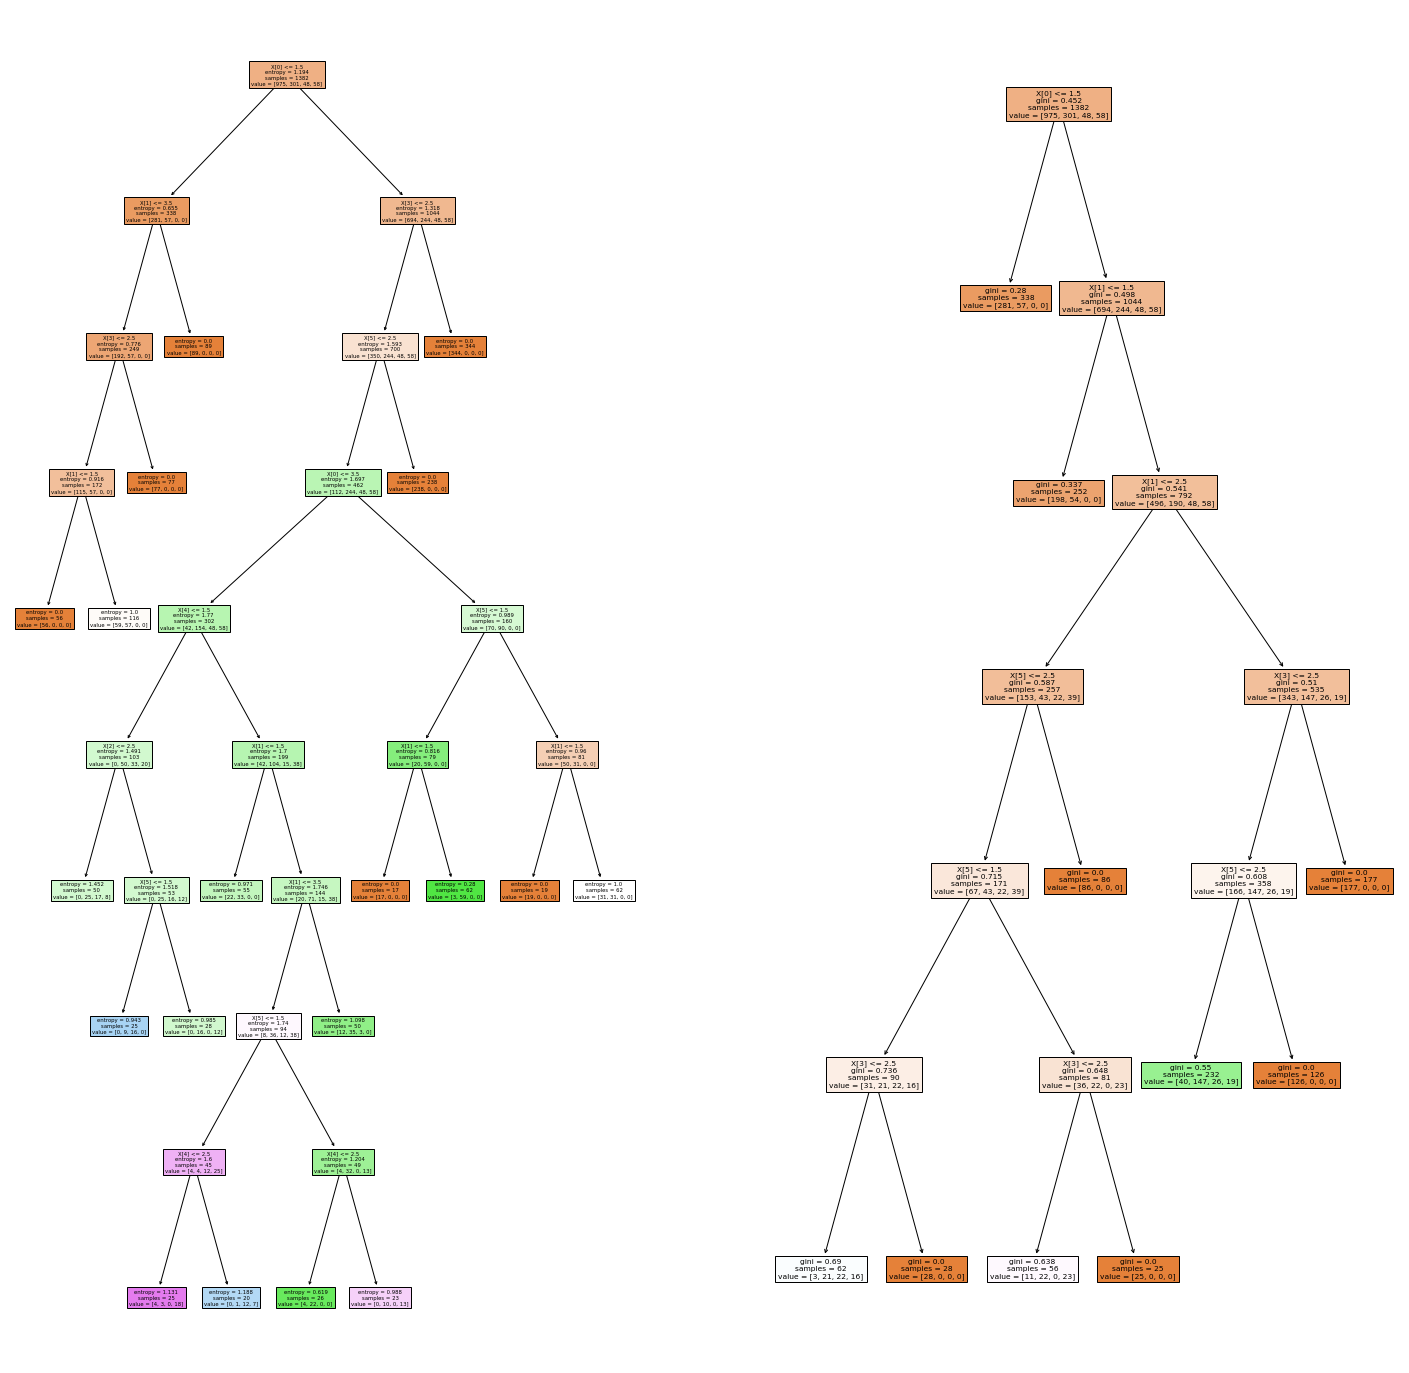

In [213]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(25,25))
_ = tree.plot_tree(clf_1.best_estimator_, filled = True, ax = ax1)
_ = tree.plot_tree(clf_2.best_estimator_, filled = True, ax = ax2)

In [214]:
print(f'Arbre entropy:\n\tNodes: {numero_nodes(clf_1.best_estimator_)}\n\tFulles: {numero_fulles(clf_1.best_estimator_)}\n\tRatio Nodes-Fulles:{ratio_nodes_fulla(clf_1.best_estimator_)}\n\tProfunditat: {profunditat(clf_1.best_estimator_)}')
print(f'Arbre Gini:\n\tNodes: {numero_nodes(clf_2.best_estimator_)}\n\tFulles: {numero_fulles(clf_2.best_estimator_)}\n\tRatio Nodes-Fulles:{ratio_nodes_fulla(clf_2.best_estimator_)}\n\tProfunditat: {profunditat(clf_2.best_estimator_)}')

Arbre entropy:
	Nodes: 37
	Fulles: 19
	Ratio Nodes-Fulles:0.5135135135135135
	Profunditat: 9
Arbre Gini:
	Nodes: 19
	Fulles: 10
	Ratio Nodes-Fulles:0.5263157894736842
	Profunditat: 6


In [215]:
print('Score del entropy sobre el Train',clf_1.score(encoded_X_train_1, encoded_y_train_1))
print('Score del Gini sobre el Train',clf_2.score(encoded_X_train_1, encoded_y_train_1))

Score del entropy sobre el Train 0.8531114327062229
Score del Gini sobre el Train 0.8053545586107091


## C. Pruning (20%)

L'overfitting és un problema comú quan es construeixen models d’arbres de decisions. El problema apareix quan l'algoritme continua aprofundint cada vegada més per reduir l'error del conjunt d'entrenament, però per contra, resulta que va augmentant l'error en el conjunt de test. Per tant, la precisió final del model será menor. Generalment passa quan es creen moltes branques a causa de valors atípics i irregularitats en les dades (o mal codificades) [Exemple del resultat de tenir Atributs mal codificats en un arbre de decisió](https://stackoverflow.com/questions/61217713/labelencoder-for-categorical-features/61217936).

Dos enfocaments que es poden utilitzar per evitar l'overfitting:

* **Poda prèvia**: aturem la construcció dels arbres abans d'arribar a la fulla final. Preferim no dividir un node si la seva mesura de bondat està per sota d’un valor llindar. Però és difícil triar un punt d’aturada adequat.

* **Post poda**: aprofundim cada vegada més en l’arbre per construir un arbre complet. Si l’arbre mostra problemes d'overfitting, la poda es fa com un pas posterior al aprenentatge. Mitjançant dades de validació creuada, comprovem si ampliar un node comportarà una millora o no. Si mostra una millora, podem continuar ampliant aquest node. Però si mostra una reducció de la precisió, no s’hauria d’ampliar. Per tant, el node s’hauria de convertir en un node fulla.

### Preguntes

1. Amb els parametres del millor arbre de l'apartat anterior, realitza una poda prèvia. Com pots validar si ho estàs fent bé?
2. Realitza una poda posterior del arbre [Pista](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning).
3. Compara els arbres resultants i els resultats que se'n obtenen. S'assemblen? Quina de les dues tècniques creus que s'adecua millor a la vostra base de dades? A part de visualment, compara'ls també quantificablement.


1.

Per fer la poda hem de modificar el paràmetre ccp_alpha. Per comprovar si ho estic fent bé, en primer lloc probablement obtindre menys accuracy sobre el train i més o similar sobre el test. A més a més, tindre menys nodes i fulles. Tot i això, a la hora de la veritat veiem que sí que obtenim menys nodes i fulles però també perdem accuracy tant en el test com en el train.

Score del arbre sobre alpha 0.05 sobre el Train 0.7380607814761215
Score del arbre sobre alpha 0.05 sobre el Test 0.7196531791907514
Score del arbre sobre alpha 0.01 sobre el Train 0.8531114327062229
Score del arbre sobre alpha 0.01 sobre el Test 0.8439306358381503


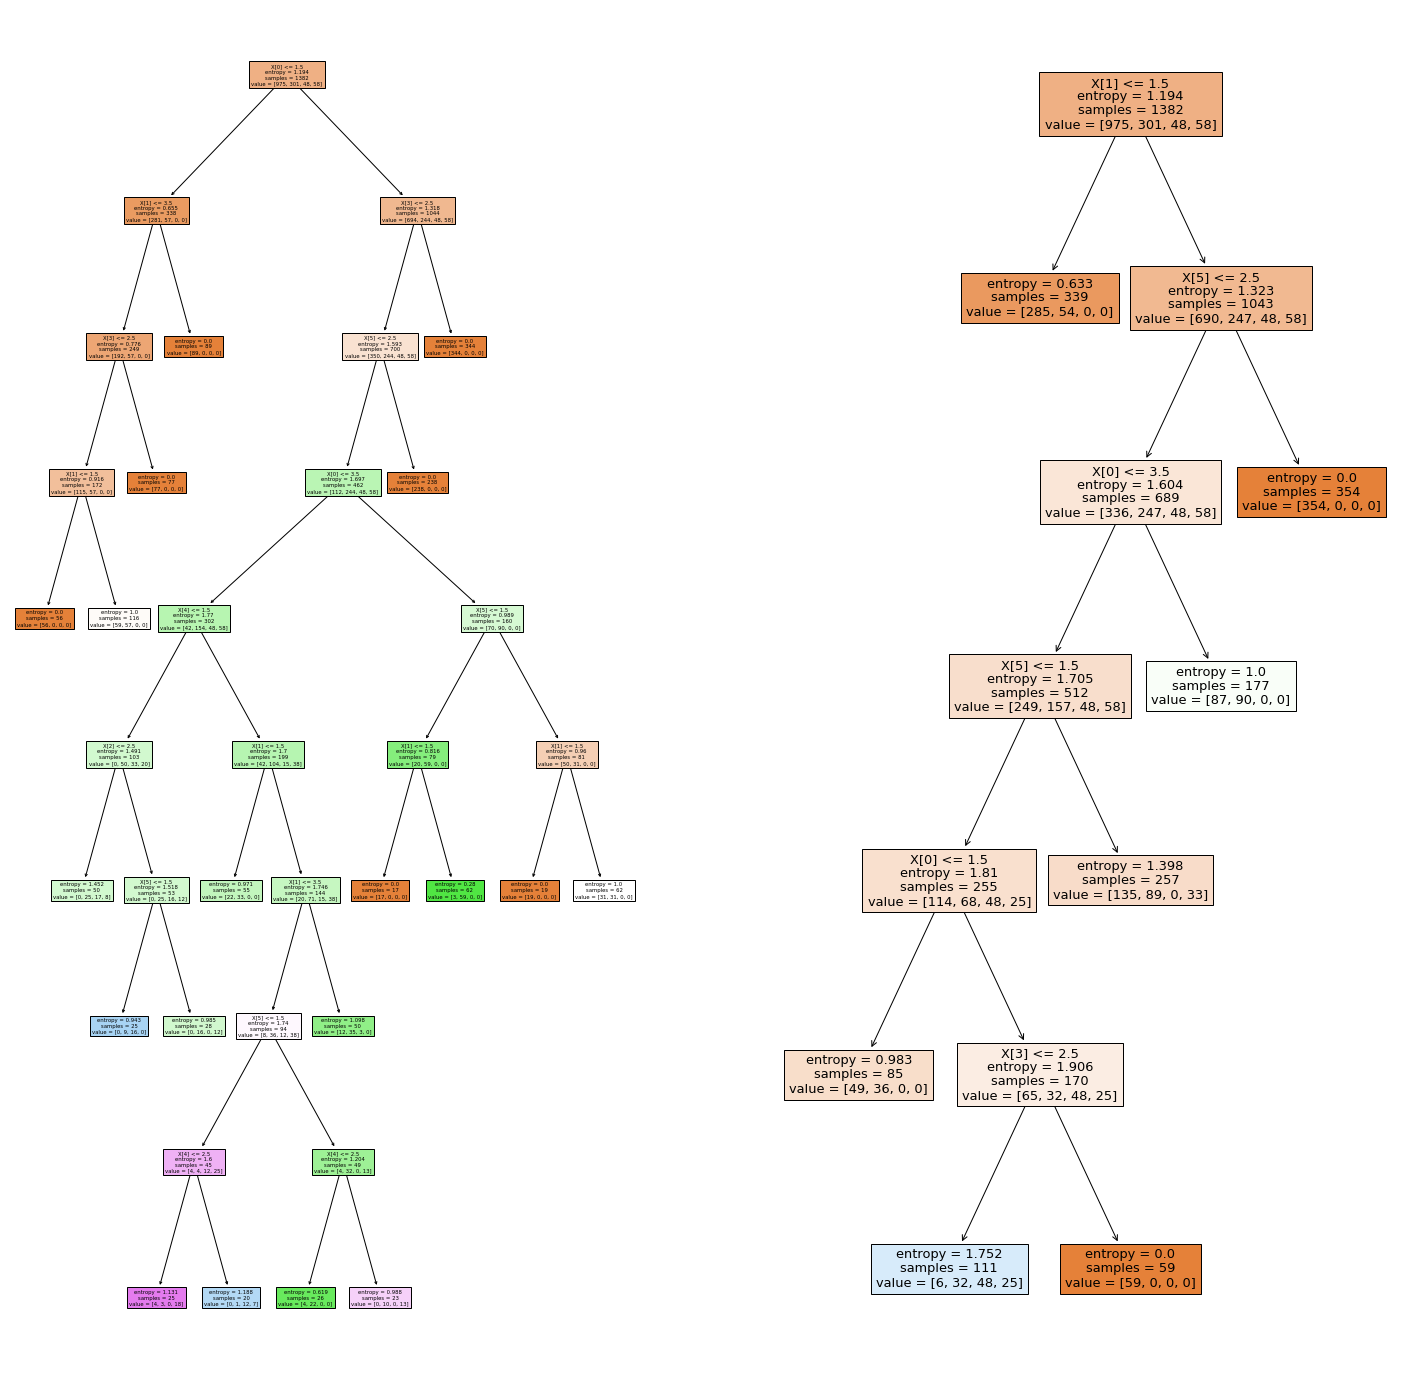

In [217]:
clf_A = tree.DecisionTreeClassifier(ccp_alpha=0.05, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')
clf_A.fit(encoded_X_train_1, encoded_y_train_1)
print('Score del arbre sobre alpha 0.05 sobre el Train',clf_A.score(encoded_X_train_1, encoded_y_train_1))
print('Score del arbre sobre alpha 0.05 sobre el Test',clf_A.score(encoded_X_test_1, encoded_y_test_1))
print('Score del arbre sobre alpha 0.01 sobre el Train',clf_1.score(encoded_X_train_1, encoded_y_train_1))
print('Score del arbre sobre alpha 0.01 sobre el Test',clf_1.score(encoded_X_test_1, encoded_y_test_1))
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(25,25))
_ = tree.plot_tree(clf_1.best_estimator_, filled = True, ax = ax1)
_ = tree.plot_tree(clf_A, filled = True, ax = ax2)

2.

La millor accuracy sobre el test que obtingut podant el arbre segons diferents ccp_alphas és: 0.914616497829233 amb alpha : 0.0
75


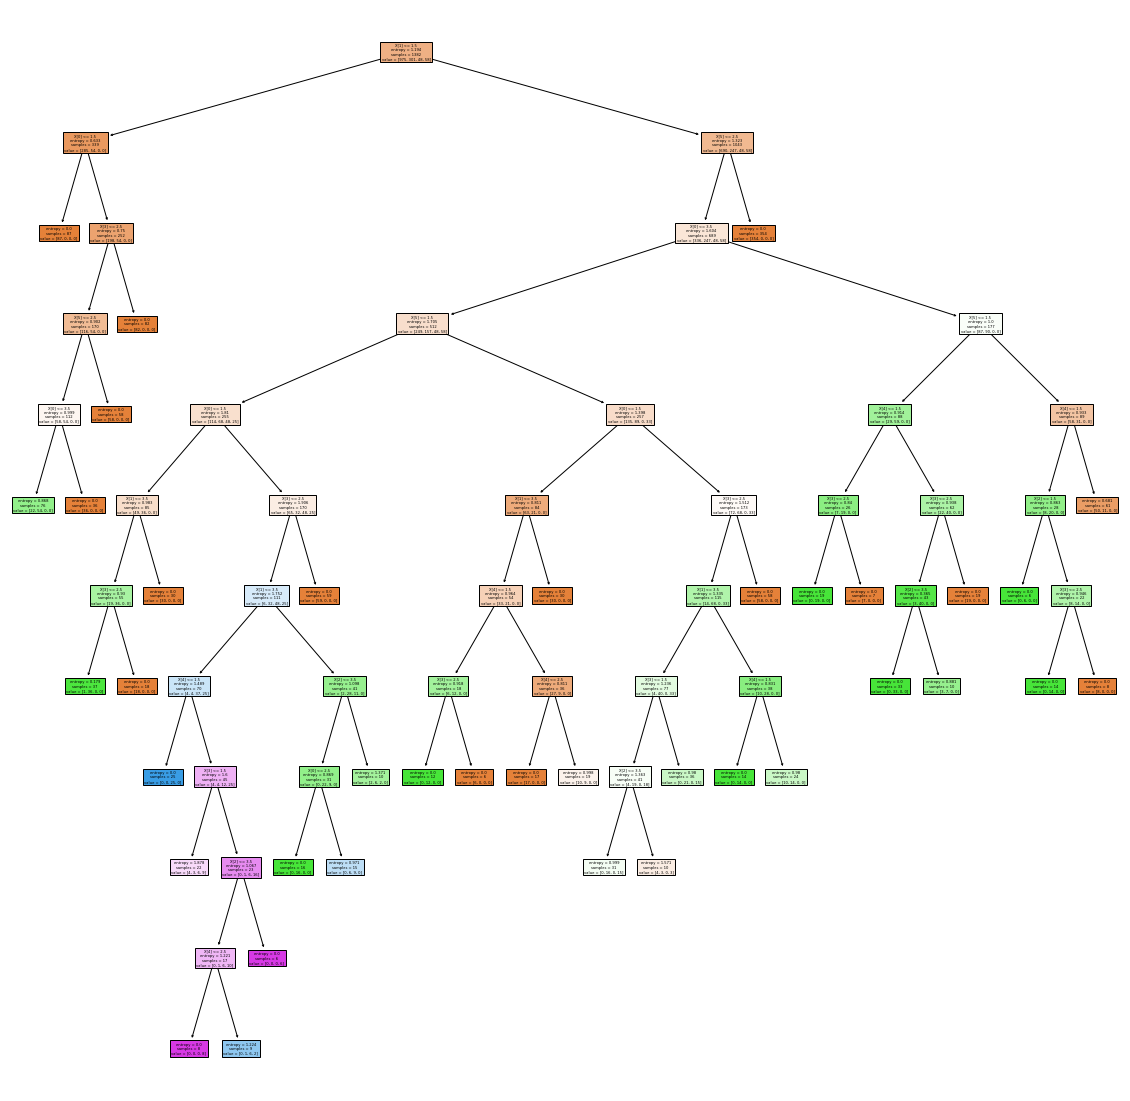

In [222]:
clf_B = tree.DecisionTreeClassifier(ccp_alpha=0.01, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')
#clf_B.fit(encoded_X_train_2, y_train)
path = clf_B.cost_complexity_pruning_path(encoded_X_train_1, encoded_y_train_1)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
clfs = []
for ccp in ccp_alphas:
    clf_tmp = tree.DecisionTreeClassifier(ccp_alpha=ccp, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')
    
    clf_tmp.fit(encoded_X_train_1, encoded_y_train_1)
    clfs.append(clf_tmp)

Acc = [clf_.score(encoded_X_train_1, encoded_y_train_1) for clf_ in clfs]
print(f'La millor accuracy sobre el test que obtingut podant el arbre segons diferents ccp_alphas és: {max(Acc)} amb alpha : {ccp_alphas[np.argmax(Acc)]}')

print(numero_nodes(clfs[np.argmax(Acc)]))
f = plt.figure(figsize=(20,20))
_ = tree.plot_tree(clfs[np.argmax(Acc)], filled = True)


La poda posterior ha consistit en transformar un arbre de 153 nodes originalment a un arbre de 103, variant l'alpha de 0.0 a 0.011. Tot i això, no he aconseguit fer la poda respecte el Arbre original del exercici anterior.

3

Tal i com podem veure, en ambdós casos considerem reduïr considerablement el número de nodes, més en la prepoda que la postpoda. Obtenim uns accuracys similars tan sobre el test com sobre el train, tot i que segueix sent considerablement menor que la accuracy amb l'alpha original a 0, és a dir, sense poda. Crec que això pot ser degut a que en l'apartat anterior, quan hem fet la hyperparameter search, ja s'ha trobat el ccp_alpha òptim i s'ha acabat amb l'overfitting respecte el que obtendriem amb un arbre original, per això tot i que fem la poda, no millorem.

## D. Ensembles (30%)

Finalment, una altra forma de reduir el overfitting és mitjançant l'ús d'ensembles. Els ensembles son agrupacions d' arbres de decisió, dels quals la sortida final és generada a través del promig de les classificacions individuals de cada arbre. 

Si tots els arbres es construïssin igual, la seva unió seria molt similar, i per tant no milloraria gaire. Per tal d'afavorir la variabilitat dels models, i aixi tenir un promig més ric, existeixen varies tècniques [documentació](https://scikit-learn.org/stable/modules/ensemble.html)

Per exemple, un dels més utilitzats són els `RandomForest`, que són una implementació especifica per ajuntar multiples arbres que retorna una mitja de la sortida de cada arbre, que ha sigut entrenat en un subconjunt aleatori de les dades. Ara bé, no són la única forma de fer ensembles. També existeixen els `ExtraTreesClassifier`, que encara afegeixen més variabilitat als arbres, restrigint la búsqueda de possibles nodes de decisió. D'altres formes d'ensembles podrien ser els `AdaBoost`, que en poques paraules, pesen els errors comesos pels arbres anteriors quan creen els següents arbres.

### Preguntes

1. Aplica models d'ensembles a les **dues** bases de dades. 
2. Compara els resultats obtinguts amb els diferents models. 
3. Quin dona millors resultats?
4. Podries tornar a combinar la sortida dels diferents classificadors que has provat?
5. I si combines models que s'han après amb caracteristiques codificades de forma diferent? Creus que aconseguiràs un resultat més bo?


1.

In [230]:
import sklearn.ensemble as en
#Base de dades de Cars:
clf_RC = en.RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0)
clf_RC.fit(encoded_X_train_1, encoded_y_train_1)
print(f'Amb Random Forest i Cars: Score sobre Train : {clf_RC.score(encoded_X_train_1, encoded_y_train_1)}, Score sobre test: {clf_RC.score(encoded_X_test_1, encoded_y_test_1)}')
clf_EC = en.ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
clf_EC.fit(encoded_X_train_1, encoded_y_train_1)
print(f'Amb Extra Trees Classifier i Cars: Score sobre Train : {clf_EC.score(encoded_X_train_1, encoded_y_train_1)}, Score sobre test: {clf_EC.score(encoded_X_test_1, encoded_y_test_1)}')


Amb Random Forest i Cars: Score sobre Train : 1.0, Score sobre test: 0.9624277456647399
Amb Extra Trees Classifier i Cars: Score sobre Train : 1.0, Score sobre test: 0.930635838150289


In [198]:
income = load_dataset('income_evaluation.csv')
display(income)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [196]:
cols = income.columns
encoder = ce.OrdinalEncoder(cols=['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country'])
encoder_2 = ce.OrdinalEncoder(cols = ['income'])

y_i = income['income']
X_i = income.drop('income', axis = 'columns')

X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_i, y_i, test_size = 0.2, random_state = 42)


encoded_X_train_i = encoder.fit_transform(X_train_i)
encoded_X_test_i = encoder.transform(X_test_i)
encoded_y_train_i = encoder_2.fit_transform(y_train_i)
encoded_y_test_i = encoder_2.transform(y_test_i)

In [229]:
#Base de dades de Income:
clf_RC_0 = en.RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0)
clf_RC_0.fit(encoded_X_train_i, encoded_y_train_i)
print(f'Amb Random Forest i Cars: Score sobre Train : {clf_RC_0.score(encoded_X_train_i, encoded_y_train_i)}, Score sobre test: {clf_RC_0.score(encoded_X_test_i, encoded_y_test_i)}')
clf_EC_0 = en.ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
clf_EC_0.fit(encoded_X_train_i, encoded_y_train_i)
print(f'Amb Extra Trees Classifier i Cars: Score sobre Train : {clf_EC_0.score(encoded_X_train_i, encoded_y_train_i)}, Score sobre test: {clf_EC_0.score(encoded_X_test_i, encoded_y_test_i)}')


Amb Random Forest i Cars: Score sobre Train : 1.0, Score sobre test: 0.8406264394288346
Amb Extra Trees Classifier i Cars: Score sobre Train : 1.0, Score sobre test: 0.82081989866421


2.

Tal i com podem veure a continuació, tant en la BD de cotxes com en la BD d'income, obtinim un score sobre el test d'1 per tots els arbres i per totes les BD i per les dues també, obtenim un score superior si utilitzem el Random forest sobre el ExtraTrees. En quant a dimensionalitat, tal i com podem veure a continuació:
En abdós casos, obtenim models molt xomplexes i tot i que el objectiu del Random forest i del Extra Trees Classifier sigui acabar amb l'overfitting, aquí definitivament patim d'overfitting.

Arbres de la BD cars
Arbre Random Forest:
	Nodes: 411
	Fulles: 206
	Ratio Nodes-Fulles:0.5012165450121655
	Profunditat: 15
Arbre Extra Trees:
	Nodes: 717
	Fulles: 359
	Ratio Nodes-Fulles:0.500697350069735
	Profunditat: 14


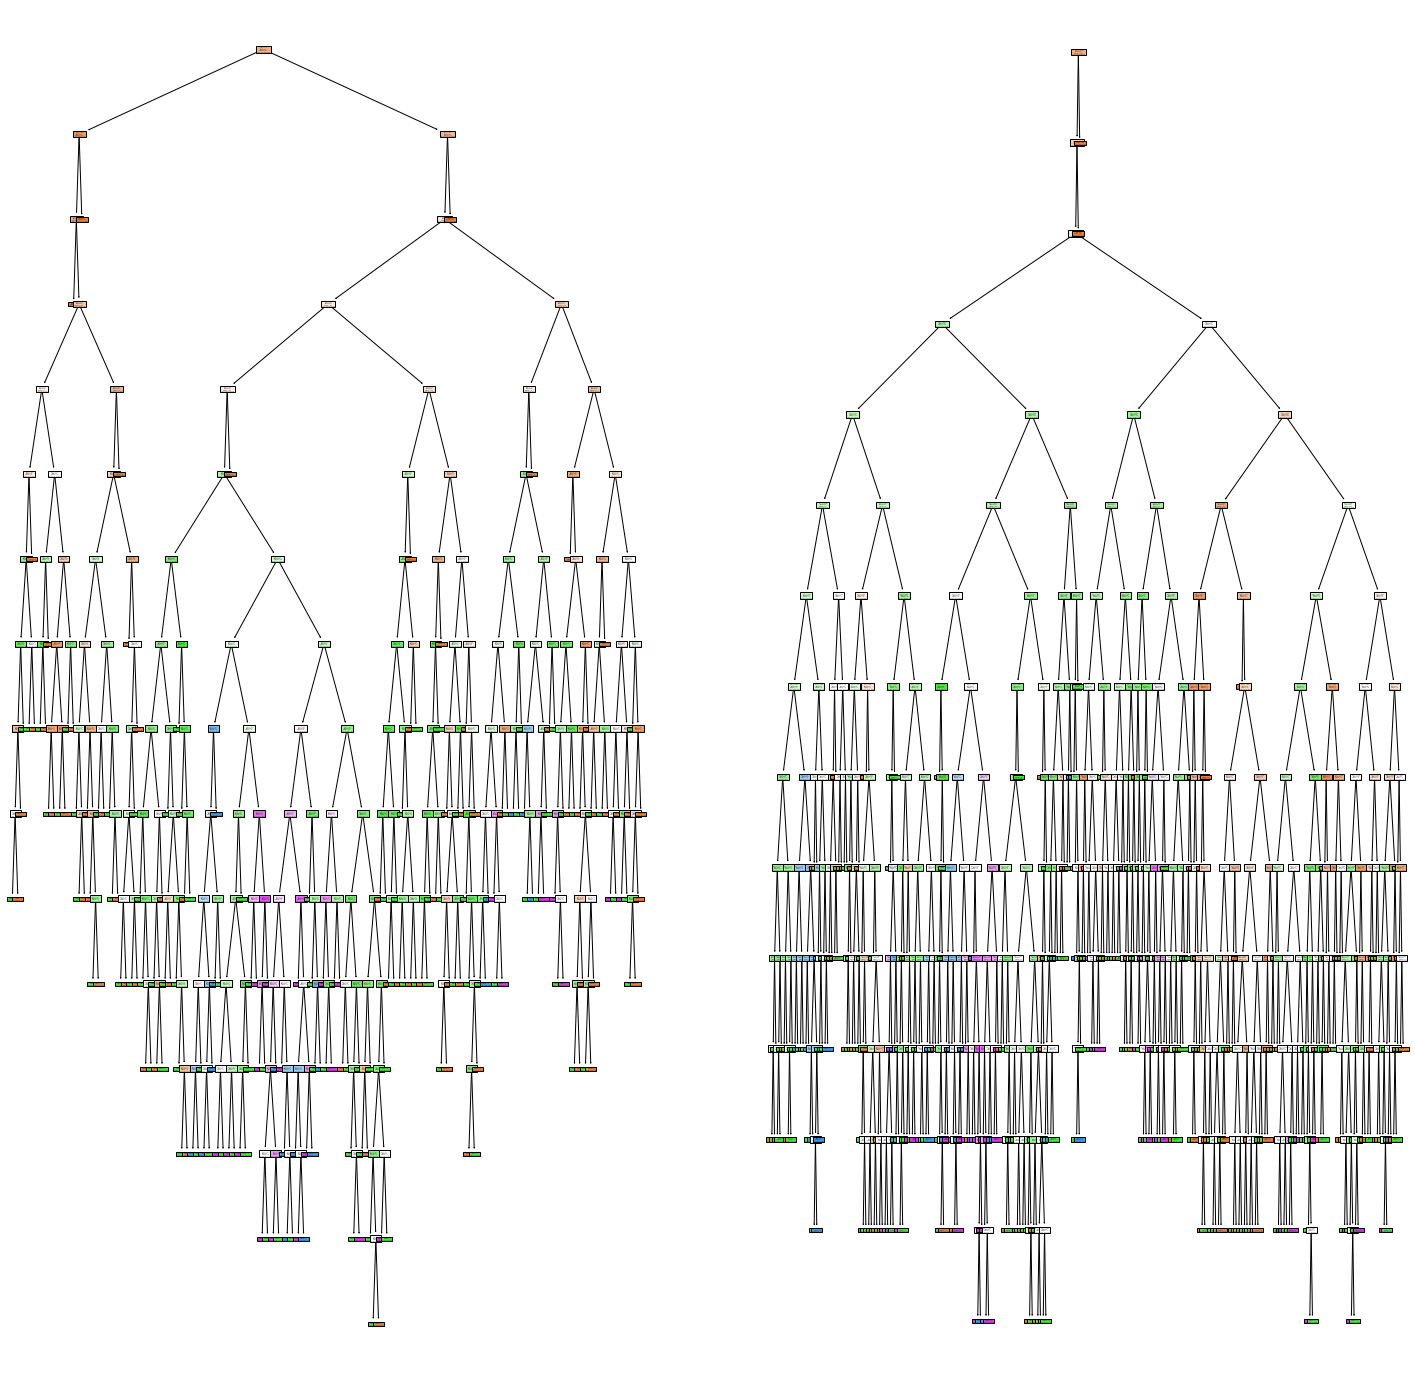

In [239]:
print('Arbres de la BD cars')
print(f'Arbre Random Forest:\n\tNodes: {numero_nodes(clf_RC.estimators_[0])}\n\tFulles: {numero_fulles(clf_RC.estimators_[0])}\n\tRatio Nodes-Fulles:{ratio_nodes_fulla(clf_RC.estimators_[0])}\n\tProfunditat: {profunditat(clf_RC.estimators_[0])}')
print(f'Arbre Extra Trees:\n\tNodes: {numero_nodes(clf_EC.estimators_[0])}\n\tFulles: {numero_fulles(clf_EC.estimators_[0])}\n\tRatio Nodes-Fulles:{ratio_nodes_fulla(clf_EC.estimators_[0])}\n\tProfunditat: {profunditat(clf_EC.estimators_[0])}')
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(25,25))
_ = tree.plot_tree(clf_RC.estimators_[0], filled = True, ax = ax1)
_ = tree.plot_tree(clf_EC.estimators_[0], filled = True, ax = ax2)

In [236]:
print('Arbres de la BD income')

print(f'Arbre Random Forest:\n\tNodes: {numero_nodes(clf_RC_0.estimators_[0])}\n\tFulles: {numero_fulles(clf_RC_0.estimators_[0])}\n\tRatio Nodes-Fulles:{ratio_nodes_fulla(clf_RC_0.estimators_[0])}\n\tProfunditat: {profunditat(clf_RC_0.estimators_[0])}')
print(f'Arbre Extra Trees:\n\tNodes: {numero_nodes(clf_EC_0.estimators_[0])}\n\tFulles: {numero_fulles(clf_EC_0.estimators_[0])}\n\tRatio Nodes-Fulles:{ratio_nodes_fulla(clf_EC_0.estimators_[0])}\n\tProfunditat: {profunditat(clf_EC_0.estimators_[0])}')

Arbres de la BD income
Arbre Random Forest:
	Nodes: 8103
	Fulles: 4052
	Ratio Nodes-Fulles:0.5000617055411576
	Profunditat: 45
Arbre Extra Trees:
	Nodes: 20769
	Fulles: 10385
	Ratio Nodes-Fulles:0.5000240743415667
	Profunditat: 53


3.

Puc concloure amb els meus dos casos i amb les dos bases de dades, que en ambdós casos trobo un model menys complexe (amb menys nodes i menys profunditat), s'executa més ràpid i obtenc un score sobre el test més gran quan faig servir el Random forest que quan faig sercir el Extra Trees Classifier. Per exemple, en la BD income,  mentre que amb el random forest tinc 8000 nodes i 4000 fulles, amb el extra trees tinc 20000 nodes i 10000 fulles, indicant així que encara tinc més overfitting fent el Extra Trees. 